In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from bokeh.sampledata.autompg import autompg as df
from bokeh.plotting import show, output_file, figure
from bokeh.io import output_notebook

output_notebook()

np.random.seed(7)
pd.set_option('display.max_columns', None)

Loading BokehJS ...

In [2]:
os.listdir("predictions")

['bert_matching_old_2_sample_100000.csv',
 'with_dropout_distilroberta_matching_pytorch_4_sample_100000.csv',
 'with_noise_distilroberta_matching_pytorch_4_sample_100000.csv',
 'bert_matching_pytorch_1_sample_100000.csv',
 'with_single_dropout_distilroberta_matching_pytorch_4_sample_100000.csv',
 'distilroberta_matching_pytorch_4_sample_100000.csv']

## Examine the control data

In [3]:
control_df = pd.read_csv('predictions/distilroberta_matching_pytorch_4_sample_100000.csv').sort_values(by=['need', 'offer'], ascending=False)
control_df.head(25)

,Unnamed: 0,need,offer,should_match,pbas
32563,3295468,[SKILL_REQUIREMNENT] z/OS,[SKILL] Teamcenter Express,False,0.000063
90293,3294475,[SKILL_REQUIREMNENT] z/OS,[SKILL] System adminstration,False,0.000082
8525,3293381,[SKILL_REQUIREMNENT] z/OS,[SKILL] Sybase,False,0.000065
28171,3295007,[SKILL_REQUIREMNENT] z/OS,[SKILL] Slat and Flap control system,False,0.000147
82910,3294173,[SKILL_REQUIREMNENT] z/OS,[SKILL] Service Offerings and Agreements,False,0.000896
67897,3295395,[SKILL_REQUIREMNENT] z/OS,[SKILL] Semi - Wafer metrology,False,0.000081
83052,3295751,[SKILL_REQUIREMNENT] z/OS,[SKILL] Search Technologies and Solutions,False,0.000804
58911,3292917,[SKILL_REQUIREMNENT] z/OS,[SKILL] SSIS,False,0.000059
31281,3294373,[SKILL_REQUIREMNENT] z/OS,[SKILL] RTRT,False,0.000070
13047,3293450,[SKILL_REQUIREMNENT] z/OS,[SKILL] Primary Flight Display (PFD),False,0.000062


In [4]:
control_df.groupby(['need', 'should_match']).agg({'pbas': ['mean','std', 'count', 'max', 'min', 'median']}).sort_values([('pbas', 'std')], ascending=False).head(50)

pbas  \
                                                                     mean   
need                                               should_match             
[SKILL_REQUIREMNENT] Process Engineering           True          0.628278   
[SKILL_REQUIREMNENT] PLM Customization & Config... True          0.636838   
[SKILL_REQUIREMNENT] Automotive-Safety             True          0.674924   
[SKILL_REQUIREMNENT] PLM Integration               True          0.770743   
[SKILL_REQUIREMNENT] Product Cost Management       True          0.787069   
[SKILL_REQUIREMNENT] Agile-PLM                     True          0.712742   
[SKILL_REQUIREMNENT] Industrial Engineering - P... True          0.615506   
[SKILL_REQUIREMNENT] PLM Consulting                True          0.699514   
[SKILL_REQUIREMNENT] Automotive Engine Calibration False         0.044615   
[SKILL_REQUIREMNENT] PLM-Engineering Change Man... False         0.032985   
[SKILL_REQUIREMNENT] Hp-Test partner               False         0.030185   
[SKILL_REQUIREMNENT] Standard Widget Toolkit (SWT) False         0.034539   
[SKILL_REQUIREMNENT] PLM Application Performance   False         0.024299   
[SKILL_REQUIREMNENT] Automotive Functional Testing False         0.033460   
[SKILL_REQUIREMNENT] ENOVIA Product Quality Cen... False         0.023762   
[SKILL_REQUIREMNENT] Automotive Communication T... False         0.026589   
[SKILL_REQUIREMNENT] Framework-eCommerce           False         0.023287   
[SKILL_REQUIREMNENT] iSeries-Cross Reference Tools False         0.021906   
[SKILL_REQUIREMNENT] IndustrialSystems-Inverter... False         0.017689   
[SKILL_REQUIREMNENT] Platform-Linux                False         0.024746   
[SKILL_REQUIREMNENT] Test Development-Verigy Le... False         0.019940   
[SKILL_REQUIREMNENT] Medical Devices-Renal         False         0.017071   
[SKILL_REQUIREMNENT] iSeries-Databases             False         0.016181   
[SKILL_REQUIREMNENT] PCB Electrical constrain s... False         0.015626   
[SKILL_REQUIREMNENT] VLSI-Verification Methodology False         0.020825   
[SKILL_REQUIREMNENT] Circuit Simulation & Analy... False         0.016727   
[SKILL_REQUIREMNENT] Code UI                       False         0.017145   
[SKILL_REQUIREMNENT] VLSI-Emulation                False         0.021557   
[SKILL_REQUIREMNENT] Medical-Reliability           True          0.583767   
[SKILL_REQUIREMNENT] ERP – Financial Management... False         0.016235   
[SKILL_REQUIREMNENT] Power Distribution            False         0.016714   
[SKILL_REQUIREMNENT] Mainframe-Tools               False         0.019943   
[SKILL_REQUIREMNENT] PCB Design Tool               False         0.015974   
[SKILL_REQUIREMNENT] Food Processors               False         0.015239   
[SKILL_REQUIREMNENT] ECAD Tools                    False         0.017906   
[SKILL_REQUIREMNENT] Tecnomatix Xfactory-Factor... False         0.015453   
[SKILL_REQUIREMNENT] PLM Infrastructure Perform... False         0.016590   
[SKILL_REQUIREMNENT] R libraries                   False         0.016715   
[SKILL_REQUIREMNENT] Mapping Tools                 False         0.019319   
[SKILL_REQUIREMNENT] Security Tools                False         0.015382   
[SKILL_REQUIREMNENT] PL/SQL                        False         0.013959   
[SKILL_REQUIREMNENT] Software Testing Methodolo... False         0.020477   
[SKILL_REQUIREMNENT] Automotive Engine Calibration True          0.836567   
[SKILL_REQUIREMNENT] Platform-Container            False         0.014480   
[SKILL_REQUIREMNENT] Product Electrical Safety ... False         0.018578   
[SKILL_REQUIREMNENT] M3 Integration consultants    False         0.022502   
[SKILL_REQUIREMNENT] Inteface design               False         0.014885   
[SKILL_REQUIREMNENT] Tooling & Fixture Manufact... False         0.022419   
[SKILL_REQUIREMNENT] Data Analytics Tools          True          0.713724   
[SKILL_REQUIREMNENT] VLSI-EDA-FPGA Implementation  False         

In [5]:
control_df.groupby(['offer', 'should_match']).agg({'pbas': ['mean','std', 'count', 'max', 'min', 'median']}).sort_values([('pbas', 'std')], ascending=False).head(50)

pbas  \
                                                                   mean   
offer                                            should_match             
[SKILL] PLM-Program/Project Management           True          0.666360   
[SKILL] Functional Testing: Hardware             True          0.712223   
[SKILL] PLM Business Processes                   True          0.815013   
[SKILL] Product Management                       True          0.796999   
[SKILL] Testing Tools -Automation                True          0.799525   
[SKILL] Product Cost Management                  True          0.779036   
[SKILL] Manufacturing Execution Systems          False         0.053431   
[SKILL] ATE Dev (Automated Test System)-Hardware False         0.045982   
[SKILL] 3DEXPERIENCE Platform Fundamentals       False         0.033148   
[SKILL] PLM-CAD-BOM Alignment                    False         0.028386   
[SKILL] Motor Driver circuit                     False         0.032516   
[SKILL] PLM-Digital Manufacturing                False         0.033982   
[SKILL] PLM-Supplier Cost Management             True          0.647047   
[SKILL] VLSI-Systemblocks                        False         0.036033   
[SKILL] UI Design Tools                          False         0.025544   
[SKILL] Test Development-Teradyne-FLEX           False         0.029622   
[SKILL] Motor Controller Unit (MCU)              True          0.618961   
[SKILL] Functional Testing: Hardware             False         0.033912   
[SKILL] PLM - ENOVIA                             True          0.624335   
[SKILL] PLM-Configurator Mgmt & EBOM Generation  False         0.026729   
[SKILL] Embedded GUI Tools                       False         0.028794   
[SKILL] PLM - Product Structure Management       False         0.032306   
[SKILL] PLM-Process Simulation and Validation    False         0.027784   
[SKILL] VLSI-EDA-Simulation                      False         0.024488   
[SKILL] PADS-POWER PCB                           False         0.019006   
[SKILL] Software Development                     False         0.026597   
[SKILL] PLM-Quality Management                   False         0.021249   
[SKILL] M3  System Engineers & Installers        False         0.031006   
[SKILL] Tool Design                              False         0.023039   
[SKILL] CAD Kernels & Toolkits                   False         0.035803   
[SKILL] PCB Electrical constrain setting         False         0.017118   
[SKILL] Software Testing Principles and Concepts False         0.018099   
[SKILL] PLM-Supplier Cost Management             False         0.015222   
[SKILL] Freemarker Template Library (FTL)        False         0.016674   
[SKILL] PLM-Configuration Management             True          0.719071   
[SKILL] Test Development -Analog high end        False         0.020159   
[SKILL] Micosoft PlayReady                       False         0.015908   
[SKILL] Test Development-Advantest-Legacy        False         0.020580   
[SKILL] Defect Tracking Tools                    False         0.015900   
[SKILL] Industrial Engineering - Process Optimiz False         0.015508   
[SKILL] PLM-EBOM Management                      False         0.014812   
[SKILL] SOAP                                     False         0.014758   
[SKILL] Auto - ISO26262 Process                  False         0.015910   
[SKILL] System Analysis and Integration          False         0.018069   
[SKILL] Medical-XRAY                             False         0.015265   
[SKILL] JBA                                      False         0.021104   
[SKILL] Advanced Product Quality Planning (APQP) False         0.020251   
[SKILL] Standards - System Engineering           False         0.015001   
[SKILL] Polyspace/Psuedo Dynamic Code Analy Tool False         0.026588   
[SKILL] Testing Tools -Automation                False         0.020199   

                                                                               \
          

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12c2a0590>,
      dtype=object)

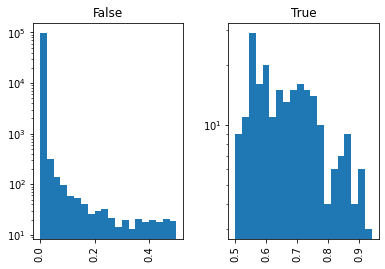

In [6]:
control_df.hist(column='pbas', by='should_match', log=True, bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bfa8850>]],
      dtype=object)

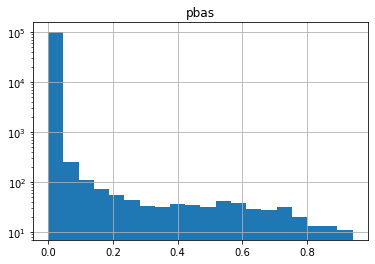

In [7]:
control_df.hist(column='pbas', bins=20, log=True)

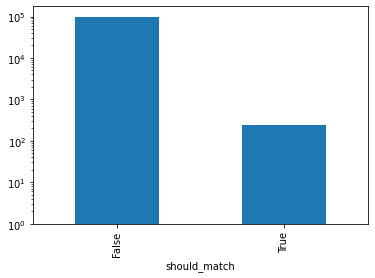

In [8]:
control_df.groupby('should_match')['pbas'].count().plot.bar(x='pbas', log=True)

## Compare for different model versions

### Tensorflow Bert v2

In [9]:
bert_df = pd.read_csv('predictions/bert_matching_old_2_sample_100000.csv').sort_values(by=['need', 'offer'], ascending=False)
bert_df.head(25)

,Unnamed: 0,need,offer,should_match,pbas
32563,3295468,[SKILL_REQUIREMNENT] z/OS,[SKILL] Teamcenter Express,False,0.000048
90293,3294475,[SKILL_REQUIREMNENT] z/OS,[SKILL] System adminstration,False,0.000242
8525,3293381,[SKILL_REQUIREMNENT] z/OS,[SKILL] Sybase,False,0.000097
28171,3295007,[SKILL_REQUIREMNENT] z/OS,[SKILL] Slat and Flap control system,False,0.000017
82910,3294173,[SKILL_REQUIREMNENT] z/OS,[SKILL] Service Offerings and Agreements,False,0.000024
67897,3295395,[SKILL_REQUIREMNENT] z/OS,[SKILL] Semi - Wafer metrology,False,0.000033
83052,3295751,[SKILL_REQUIREMNENT] z/OS,[SKILL] Search Technologies and Solutions,False,0.000021
58911,3292917,[SKILL_REQUIREMNENT] z/OS,[SKILL] SSIS,False,0.000291
31281,3294373,[SKILL_REQUIREMNENT] z/OS,[SKILL] RTRT,False,0.000348
13047,3293450,[SKILL_REQUIREMNENT] z/OS,[SKILL] Primary Flight Display (PFD),False,0.000045


In [10]:
assert len(control_df) == len(bert_df), "BERT Dataset mismatch!"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12b2fbc10>,
      dtype=object)

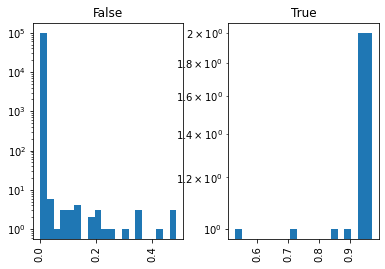

In [11]:
bert_df.hist(column='pbas', by='should_match', log=True, bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fc8a450>]],
      dtype=object)

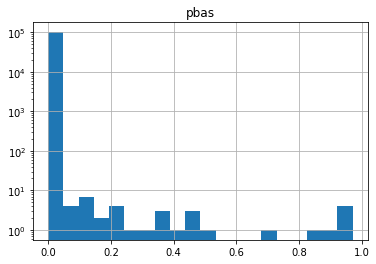

In [12]:
bert_df.hist(column='pbas', bins=20, log=True)

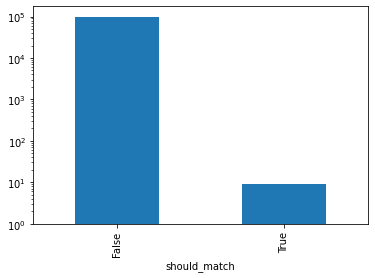

In [13]:
bert_df.groupby('should_match')['pbas'].count().plot.bar(x='pbas', log=True)

In [14]:
print("\n Paired t-test - assumes normality:")
stat, p = stats.ttest_rel(control_df['pbas'], bert_df['pbas'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
print("\n Wilcoxon test - non-parametric:")
stat, p = stats.wilcoxon(control_df['pbas'], bert_df['pbas'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


 Paired t-test - assumes normality:
stat=26.234, p=0.000
Probably different distributions

 Wilcoxon test - non-parametric:
stat=1129947893.000, p=0.000
Probably different distributions


In [15]:
diff_class = control_df['should_match'].astype(int) - bert_df['should_match'].astype(int)
diff_class.apply(lambda x: abs(x)).sum()

231

### Pytorch Bert v1

In [16]:
pytorch_bert_df = pd.read_csv('predictions/bert_matching_pytorch_1_sample_100000.csv').sort_values(by=['need', 'offer'], ascending=False)
bert_df.head(25)

,Unnamed: 0,need,offer,should_match,pbas
32563,3295468,[SKILL_REQUIREMNENT] z/OS,[SKILL] Teamcenter Express,False,0.000048
90293,3294475,[SKILL_REQUIREMNENT] z/OS,[SKILL] System adminstration,False,0.000242
8525,3293381,[SKILL_REQUIREMNENT] z/OS,[SKILL] Sybase,False,0.000097
28171,3295007,[SKILL_REQUIREMNENT] z/OS,[SKILL] Slat and Flap control system,False,0.000017
82910,3294173,[SKILL_REQUIREMNENT] z/OS,[SKILL] Service Offerings and Agreements,False,0.000024
67897,3295395,[SKILL_REQUIREMNENT] z/OS,[SKILL] Semi - Wafer metrology,False,0.000033
83052,3295751,[SKILL_REQUIREMNENT] z/OS,[SKILL] Search Technologies and Solutions,False,0.000021
58911,3292917,[SKILL_REQUIREMNENT] z/OS,[SKILL] SSIS,False,0.000291
31281,3294373,[SKILL_REQUIREMNENT] z/OS,[SKILL] RTRT,False,0.000348
13047,3293450,[SKILL_REQUIREMNENT] z/OS,[SKILL] Primary Flight Display (PFD),False,0.000045


In [17]:
assert len(control_df) == len(pytorch_bert_df), "BERT Dataset mismatch!"

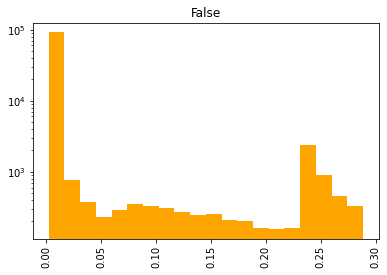

In [18]:
pytorch_bert_df.hist(column='pbas', by='should_match', log=True, bins=20, color='orange')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d9145d0>]],
      dtype=object)

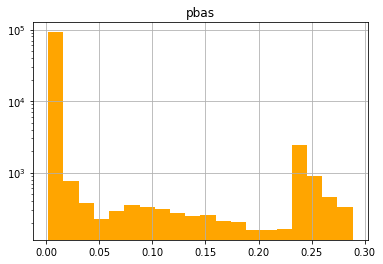

In [19]:
pytorch_bert_df.hist(column='pbas', bins=20, log=True, color='orange')

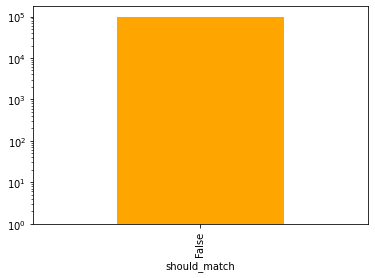

In [20]:
pytorch_bert_df.groupby('should_match')['pbas'].count().plot.bar(x='pbas', log=True, color='orange')

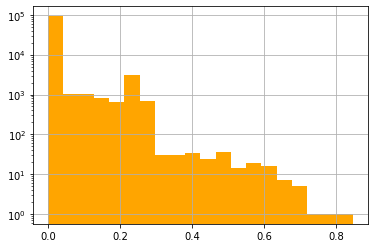

In [21]:
diff = control_df['pbas'] - pytorch_bert_df['pbas']
diff.apply(lambda x: abs(x)).hist(bins=20, log=True, color='orange')

In [22]:
print("\n Paired t-test - assumes normality:")
stat, p = stats.ttest_rel(control_df['pbas'], pytorch_bert_df['pbas'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
print("\n Wilcoxon test - non-parametric:")
stat, p = stats.wilcoxon(control_df['pbas'], pytorch_bert_df['pbas'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


 Paired t-test - assumes normality:
stat=-79.988, p=0.000
Probably different distributions

 Wilcoxon test - non-parametric:
stat=144581615.000, p=0.000
Probably different distributions


In [23]:
diff_class = control_df['should_match'].astype(int) - pytorch_bert_df['should_match'].astype(int)
diff_class.apply(lambda x: abs(x)).sum()

233

## Compare for inputs with added noise

In [24]:
noise_df = pd.read_csv('predictions/with_noise_distilroberta_matching_pytorch_4_sample_100000.csv').sort_values(by=['need', 'offer'], ascending=False)
noise_df.head(25)

,Unnamed: 0,need,offer,should_match,pbas
48085,3294517,[SKILL_REQUIREMNENT] z/OS expert,[SKILL] professional ADSP,False,0.000148
69364,3294432,[SKILL_REQUIREMNENT] z/OS expert,[SKILL] Installshield,False,0.000062
17721,3293415,[SKILL_REQUIREMNENT] z/OS expert,[SKILL] Backnet expert,False,0.052809
82910,3294173,[SKILL_REQUIREMNENT] z/OS,[SKILL] professional Service Offerings and Agr...,False,0.001794
58911,3292917,[SKILL_REQUIREMNENT] z/OS,[SKILL] professional SSIS,False,0.000060
83046,3295929,[SKILL_REQUIREMNENT] z/OS,[SKILL] professional Language,False,0.000067
21700,3293801,[SKILL_REQUIREMNENT] z/OS,[SKILL] professional DSP Assembly,False,0.000065
41460,3295153,[SKILL_REQUIREMNENT] z/OS,[SKILL] professional Amplifier / OPAMPs,False,0.000106
58536,3294748,[SKILL_REQUIREMNENT] z/OS,[SKILL] professional 510(k),False,0.000100
83052,3295751,[SKILL_REQUIREMNENT] z/OS,[SKILL] Search Technologies and Solutions expert,False,0.005134


In [25]:
assert len(control_df) == len(noise_df), "BERT Dataset mismatch!"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12da28a50>,
      dtype=object)

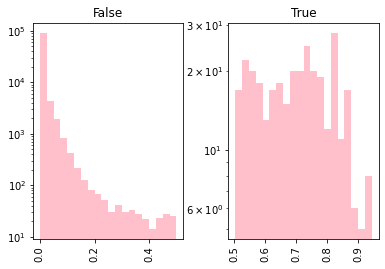

In [26]:
noise_df.hist(column='pbas', by='should_match', log=True, bins=20, color='pink')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13139a250>]],
      dtype=object)

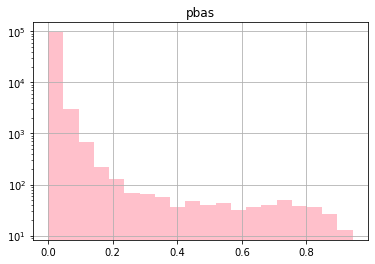

In [27]:
noise_df.hist(column='pbas', bins=20, log=True, color='pink')

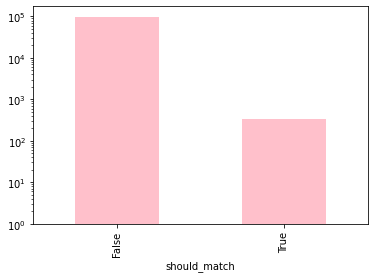

In [28]:
noise_df.groupby('should_match')['pbas'].count().plot.bar(x='pbas', log=True, color='pink')

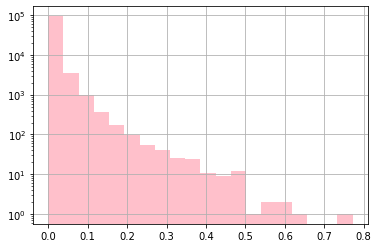

In [29]:
diff = control_df['pbas'] -  noise_df['pbas']
diff.apply(lambda x: abs(x)).hist(bins=20, log=True, color='pink')

In [30]:
print("\n Paired t-test - assumes normality:")
stat, p = stats.ttest_rel(control_df['pbas'], noise_df['pbas'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
print("\n Wilcoxon test - non-parametric:")
stat, p = stats.wilcoxon(control_df['pbas'], noise_df['pbas'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


 Paired t-test - assumes normality:
stat=-33.424, p=0.000
Probably different distributions

 Wilcoxon test - non-parametric:
stat=1120797766.000, p=0.000
Probably different distributions


In [31]:
diff_class = control_df['should_match'].astype(int) - noise_df['should_match'].astype(int)
diff_class.apply(lambda x: abs(x)).sum()

122

## Compare for  models with active dropout

### DistilRoberta with active dropout on all layers during inference (including attention layers), but with a probability of 0.1 per layer

In [32]:
all_dropout_df = pd.read_csv('predictions/with_dropout_distilroberta_matching_pytorch_4_sample_100000.csv').sort_values(by=['need', 'offer'], ascending=False)
all_dropout_df.head(25)

,Unnamed: 0,need,offer,should_match,pbas
32563,3295468,[SKILL_REQUIREMNENT] z/OS,[SKILL] Teamcenter Express,False,0.000129
90293,3294475,[SKILL_REQUIREMNENT] z/OS,[SKILL] System adminstration,False,0.000236
8525,3293381,[SKILL_REQUIREMNENT] z/OS,[SKILL] Sybase,False,0.000148
28171,3295007,[SKILL_REQUIREMNENT] z/OS,[SKILL] Slat and Flap control system,False,0.000211
82910,3294173,[SKILL_REQUIREMNENT] z/OS,[SKILL] Service Offerings and Agreements,False,0.000400
67897,3295395,[SKILL_REQUIREMNENT] z/OS,[SKILL] Semi - Wafer metrology,False,0.000094
83052,3295751,[SKILL_REQUIREMNENT] z/OS,[SKILL] Search Technologies and Solutions,False,0.000993
58911,3292917,[SKILL_REQUIREMNENT] z/OS,[SKILL] SSIS,False,0.000102
31281,3294373,[SKILL_REQUIREMNENT] z/OS,[SKILL] RTRT,False,0.000119
13047,3293450,[SKILL_REQUIREMNENT] z/OS,[SKILL] Primary Flight Display (PFD),False,0.000131


In [33]:
assert len(control_df) == len(all_dropout_df), "BERT Dataset mismatch!"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x132881790>,
      dtype=object)

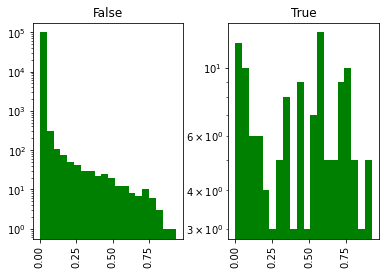

In [35]:
all_dropout_df.hist(column='pbas', by='should_match', log=True, bins=20, color='green')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x132fd8b50>]],
      dtype=object)

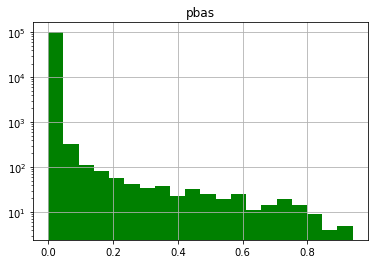

In [37]:
all_dropout_df.hist(column='pbas', bins=20, log=True, color='green')

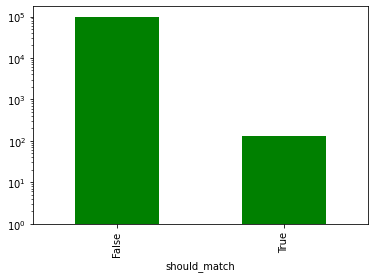

In [38]:
all_dropout_df.groupby('should_match')['pbas'].count().plot.bar(x='pbas', log=True, color='green')

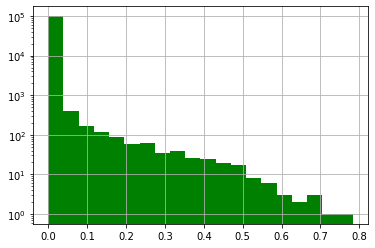

In [39]:
diff = control_df['pbas'] -  all_dropout_df['pbas']
diff.apply(lambda x: abs(x)).hist(bins=20, log=True, color='green')

In [40]:
print("\n Paired t-test - assumes normality:")
stat, p = stats.ttest_rel(control_df['pbas'], all_dropout_df['pbas'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
print("\n Wilcoxon test - non-parametric:")
stat, p = stats.wilcoxon(control_df['pbas'], all_dropout_df['pbas'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


 Paired t-test - assumes normality:
stat=4.198, p=0.000
Probably different distributions

 Wilcoxon test - non-parametric:
stat=601029164.000, p=0.000
Probably different distributions


In [41]:
diff_class = control_df['should_match'].astype(int) - all_dropout_df['should_match'].astype(int)
diff_class.apply(lambda x: abs(x)).sum()

162

### DistilRoberta with active dropout during inference only on middle hidden layer (not attention layer), with a probability of 1.0

In [42]:
one_dropout_df = pd.read_csv('predictions/with_single_dropout_distilroberta_matching_pytorch_4_sample_100000.csv').sort_values(by=['need', 'offer'], ascending=False)
one_dropout_df.head(25)

,Unnamed: 0,need,offer,should_match,pbas
32563,3295468,[SKILL_REQUIREMNENT] z/OS,[SKILL] Teamcenter Express,False,0.003136
90293,3294475,[SKILL_REQUIREMNENT] z/OS,[SKILL] System adminstration,False,0.004808
8525,3293381,[SKILL_REQUIREMNENT] z/OS,[SKILL] Sybase,False,0.003400
28171,3295007,[SKILL_REQUIREMNENT] z/OS,[SKILL] Slat and Flap control system,False,0.005344
82910,3294173,[SKILL_REQUIREMNENT] z/OS,[SKILL] Service Offerings and Agreements,False,0.010876
67897,3295395,[SKILL_REQUIREMNENT] z/OS,[SKILL] Semi - Wafer metrology,False,0.003358
83052,3295751,[SKILL_REQUIREMNENT] z/OS,[SKILL] Search Technologies and Solutions,False,0.010118
58911,3292917,[SKILL_REQUIREMNENT] z/OS,[SKILL] SSIS,False,0.002180
31281,3294373,[SKILL_REQUIREMNENT] z/OS,[SKILL] RTRT,False,0.002926
13047,3293450,[SKILL_REQUIREMNENT] z/OS,[SKILL] Primary Flight Display (PFD),False,0.003277


In [43]:
assert len(control_df) == len(one_dropout_df), "BERT Dataset mismatch!"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x131414110>,
      dtype=object)

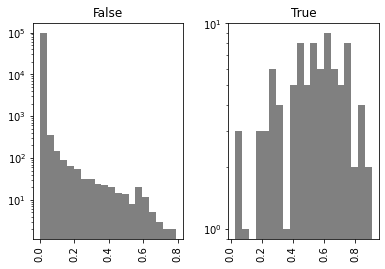

In [44]:
one_dropout_df.hist(column='pbas', by='should_match', log=True, bins=20, color='gray')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1336eed10>]],
      dtype=object)

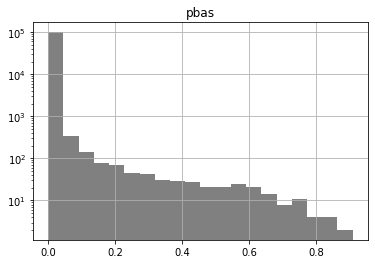

In [45]:
one_dropout_df.hist(column='pbas', bins=20, log=True, color='gray')

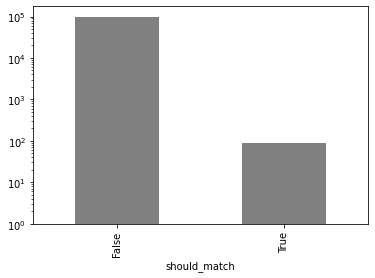

In [46]:
one_dropout_df.groupby('should_match')['pbas'].count().plot.bar(x='pbas', log=True, color='gray')

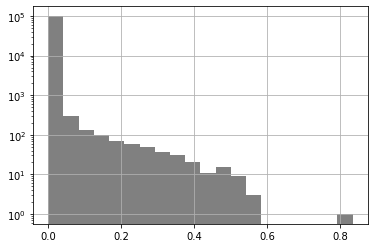

In [47]:
diff = control_df['pbas'] -  one_dropout_df['pbas']
diff.apply(lambda x: abs(x)).hist(bins=20, log=True, color='gray')

In [48]:
print("\n Paired t-test - assumes normality:")
stat, p = stats.ttest_rel(control_df['pbas'], one_dropout_df['pbas'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')
    
print("\n Wilcoxon test - non-parametric:")
stat, p = stats.wilcoxon(control_df['pbas'], one_dropout_df['pbas'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


 Paired t-test - assumes normality:
stat=-54.708, p=0.000
Probably different distributions

 Wilcoxon test - non-parametric:
stat=107521011.000, p=0.000
Probably different distributions


In [49]:
diff_class = control_df['should_match'].astype(int) - one_dropout_df['should_match'].astype(int)
diff_class.apply(lambda x: abs(x)).sum()

156